# Visualizing Dollar-Euro rates (1999-2020)
The euro (symbolized with €) is the official currency in most of the countries of the European Union. We are going to visualize the euro-dollar exchange rate in the past two decades.

If the exchange rate of the euro to the US dollar is 1.5, you get 1.5 US dollars if you pay 1.0 euro (one euro has more value than one US dollar at this exchange rate).

Daria Chemkaeva put together the data set and made it available on [Kaggle](https://www.kaggle.com/lsind18/euro-exchange-daily-rates-19992020) — the data source is the European Central Bank. 

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

exchange_rates = pd.read_csv("euro_daily.csv")
exchange_rates.head()

,Period\Unit:,[Argentine peso ],[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],...,[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[New Taiwan dollar ],[US dollar ],[South African rand ]
0,2021-09-20,NaN,1.6201,1.9558,6.2495,1.5056,1.0883,7.5726,NaN,25.432,...,86.0700,10.2173,1.5839,NaN,NaN,39.0620,10.1512,NaN,1.1711,17.3301
1,2021-09-17,NaN,1.6111,1.9558,6.2039,1.4913,1.0931,7.6044,NaN,25.296,...,85.4338,10.1553,1.5851,NaN,NaN,39.1450,10.1323,NaN,1.1780,17.1891
2,2021-09-16,NaN,1.6077,1.9558,6.1611,1.4863,1.0886,7.5849,NaN,25.281,...,85.2347,10.1518,1.5805,NaN,NaN,38.9180,9.9663,NaN,1.1763,17.0544
3,2021-09-15,NaN,1.6153,1.9558,6.1979,1.5004,1.0845,7.6069,NaN,25.318,...,85.9738,10.1360,1.5860,NaN,NaN,38.8650,9.9769,NaN,1.1824,16.8973
4,2021-09-14,NaN,1.6114,1.9558,6.1788,1.4951,1.0887,7.6168,NaN,25.389,...,86.1062,10.1453,1.5870,NaN,NaN,38.9270,9.9848,NaN,1.1814,16.8097


In [11]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5878 entries, 0 to 5877
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5878 non-null   object 
 1   [Argentine peso ]         5383 non-null   object 
 2   [Australian dollar ]      5878 non-null   object 
 3   [Bulgarian lev ]          5476 non-null   object 
 4   [Brazilian real ]         5610 non-null   object 
 5   [Canadian dollar ]        5878 non-null   object 
 6   [Swiss franc ]            5878 non-null   object 
 7   [Chinese yuan renminbi ]  5610 non-null   object 
 8   [Cypriot pound ]          2346 non-null   object 
 9   [Czech koruna ]           5878 non-null   object 
 10  [Danish krone ]           5878 non-null   object 
 11  [Algerian dinar ]         5383 non-null   object 
 12  [Estonian kroon ]         3130 non-null   object 
 13  [UK pound sterling ]      5878 non-null   object 
 14  [Greek d

The dataset contains the excange rate between euro and 44 other currencies. Our major focus for this project is the United state Dollars. Thankfully, this column has no missing values but requires some cleaning.

In [12]:
exchange_rates['[US dollar ]'].unique()

array(['1.1711', '1.1780', '1.1763', ..., '1.1653', '1.1520', '1.1659'],
      dtype=object)

We will isolate the USD column and the time column into as another dataframe. The columns are not properly named, so appropriate adjustments will be made.

In [13]:
US_dollar = exchange_rates[['Period\\Unit:', '[US dollar ]' ]]
US_dollar = pd.DataFrame(US_dollar)
US_dollar.columns = ['Time', 'US dollar']

US_dollar['Time'] = pd.to_datetime(US_dollar['Time'])
US_dollar.sort_values('Time', inplace=True)
US_dollar.reset_index(drop=True, inplace=True)
US_dollar.head()

,Time,US dollar
0,1999-01-04,1.1789
1,1999-01-05,1.1790
2,1999-01-06,1.1743
3,1999-01-07,1.1632
4,1999-01-08,1.1659


In [14]:
US_dollar['US dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.2713     6
          ..
1.5340     1
1.1093     1
1.3666     1
1.5206     1
1.0798     1
Name: US dollar, Length: 3576, dtype: int64

Some rows have their values submitted as hyphens. We will drop these rows and convert the 'US dollar column to a float type.

In [15]:
drop_rows = US_dollar[US_dollar['US dollar']=='-'].index
US_dollar.drop(drop_rows, axis=0, inplace=True)
US_dollar['US dollar'] = US_dollar['US dollar'].astype(float)

In [16]:
US_dollar['rolling_mean'] = US_dollar['US dollar'].rolling(30).mean()

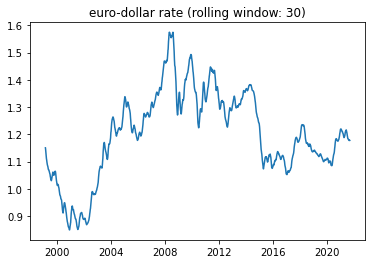

In [17]:
plt.plot(US_dollar['Time'], US_dollar['rolling_mean'])
plt.title("euro-dollar rate (rolling window: 30)")
plt.show()

We will visualize the rate about trumps time in office

In [18]:
trump_watch = US_dollar[US_dollar['Time'].dt.year >= 2017]
trump_watch_2017 = trump_watch[trump_watch['Time'].dt.year==2017]
trump_watch_2018 = trump_watch[trump_watch['Time'].dt.year==2018]
trump_watch_2019 = trump_watch[trump_watch['Time'].dt.year==2019]
trump_watch_2020 = trump_watch[trump_watch['Time'].dt.year==2020]
trump_watch_2021 = trump_watch[trump_watch['Time'].dt.year==2021]


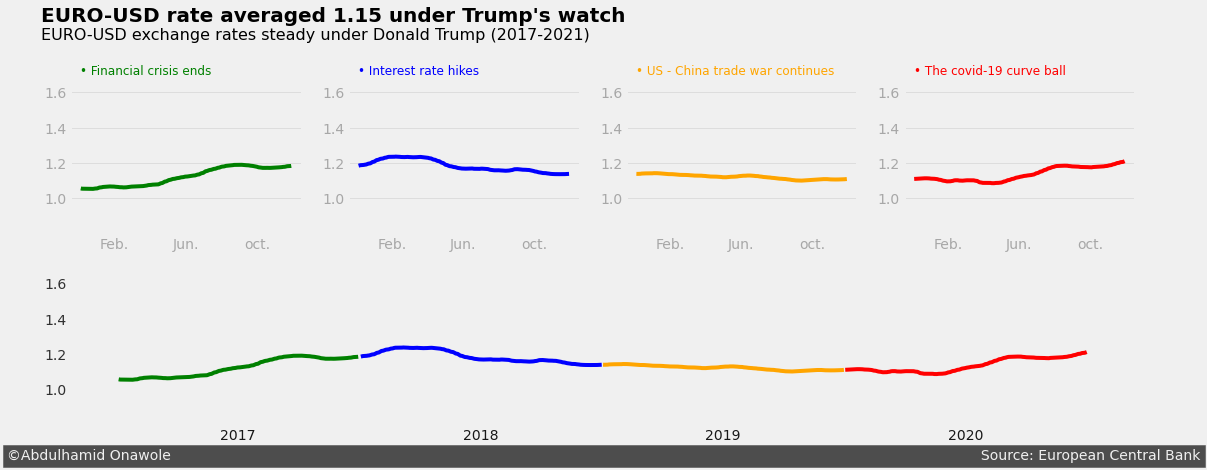

In [19]:
import warnings
warnings.filterwarnings('ignore')

### Adding the FiveThirtyEight style
plt.style.use('fivethirtyeight')

### Adding the subplots
plt.figure(figsize=(17, 6))
ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)
ax5 = plt.subplot(2,1,2)
axes = [ax1, ax2, ax3, ax4]

### Changes to all the subplots
for ax in axes:
    ax.set_ylim(0.8, 1.7)
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels(['1.0', '1.2','1.4', '1.6'],
                   alpha=0.3)
    ax.grid(alpha=0.5)    
    
ax5.set_ylim(0.8, 1.7)
ax5.set_yticks([1.0, 1.2, 1.4, 1.6])
ax5.set_yticklabels(['1.0', '1.2','1.4', '1.6'],
                   alpha=0.8)
ax5.grid(False)

## year 2017 plot
ax1.plot(trump_watch_2017['Time'], trump_watch_2017['rolling_mean'],
        color='g')
ax1.set_xticklabels(['', 'Feb.', '', 'Jun.', '', 'oct.', ''],
                   alpha=0.3)
ax1.text(17167, 1.7, '• Financial crisis ends', fontsize=12, weight='light',
        color='g')
ax1.xaxis.grid(False)


## year 2018 plot
ax2.plot(trump_watch_2018['Time'], trump_watch_2018['rolling_mean'],
        color='b')
ax2.set_xticklabels(['', 'Feb.', '', 'Jun.', '', 'oct.', ''],
                   alpha=0.3)
ax2.text(17532, 1.7, '• Interest rate hikes', fontsize=12, weight='light',
        color='b')
ax2.xaxis.grid(False)

## year 2019 plot
ax3.plot(trump_watch_2019['Time'], trump_watch_2019['rolling_mean'],
        color='orange')
ax3.set_xticklabels(['', 'Feb.', '', 'Jun.', '', 'oct.', ''],
                   alpha=0.3)
ax3.text(17897, 1.7, '• US - China trade war continues', fontsize=12, weight='light',
        color='orange')
ax3.xaxis.grid(False)

## year 2020 plot
ax4.plot(trump_watch_2020['Time'], trump_watch_2020['rolling_mean'],
        color='r')
ax4.set_xticklabels(['', 'Feb.', '', 'Jun.', '', 'oct.', ''],
                   alpha=0.3)
ax4.text(18262, 1.7, '• The covid-19 curve ball', fontsize=12, weight='light',
        color='r')
ax4.xaxis.grid(False)


## Full story
ax5.plot(trump_watch_2017['Time'], trump_watch_2017['rolling_mean'],
        color='g')
ax5.plot(trump_watch_2018['Time'], trump_watch_2018['rolling_mean'],
        color='b')

ax5.plot(trump_watch_2019['Time'], trump_watch_2019['rolling_mean'],
        color='orange')
ax5.plot(trump_watch_2020['Time'], trump_watch_2020['rolling_mean'],
        color='r')
ax5.set_xticklabels(['','2017', '','2018','','2019', '', '2020'],
                   alpha=0.9)

ax1.text(17100.0, 2.0, "EURO-USD rate averaged 1.15 under Trump's watch",
         fontsize=20, weight='bold')
ax1.text(17100, 1.9, '''EURO-USD exchange rates steady under Donald Trump (2017-2021)''',
        fontsize=16)

ax5.text(17000, 0.6, '©Abdulhamid Onawole' + ' '*180 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=14)
plt.show()
